In [492]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### 1. Read the dataset

In [493]:
data = pd.read_csv('D:\mini mini\energydata_complete.csv')

In [494]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data

The overall analysis to be made of what factors affect appliances consuming power in the household and how much of a variation does the other factors infulence the appliances consumption of power.

The date column is dropped as the analysis is not a time-series based prediction.

In [495]:
data = data.drop('date',axis=1)

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [497]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [498]:
data.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

No null values have been found, hence no need for imputation techniques however the variation of scale of different attributes might require other pre-processing techniques

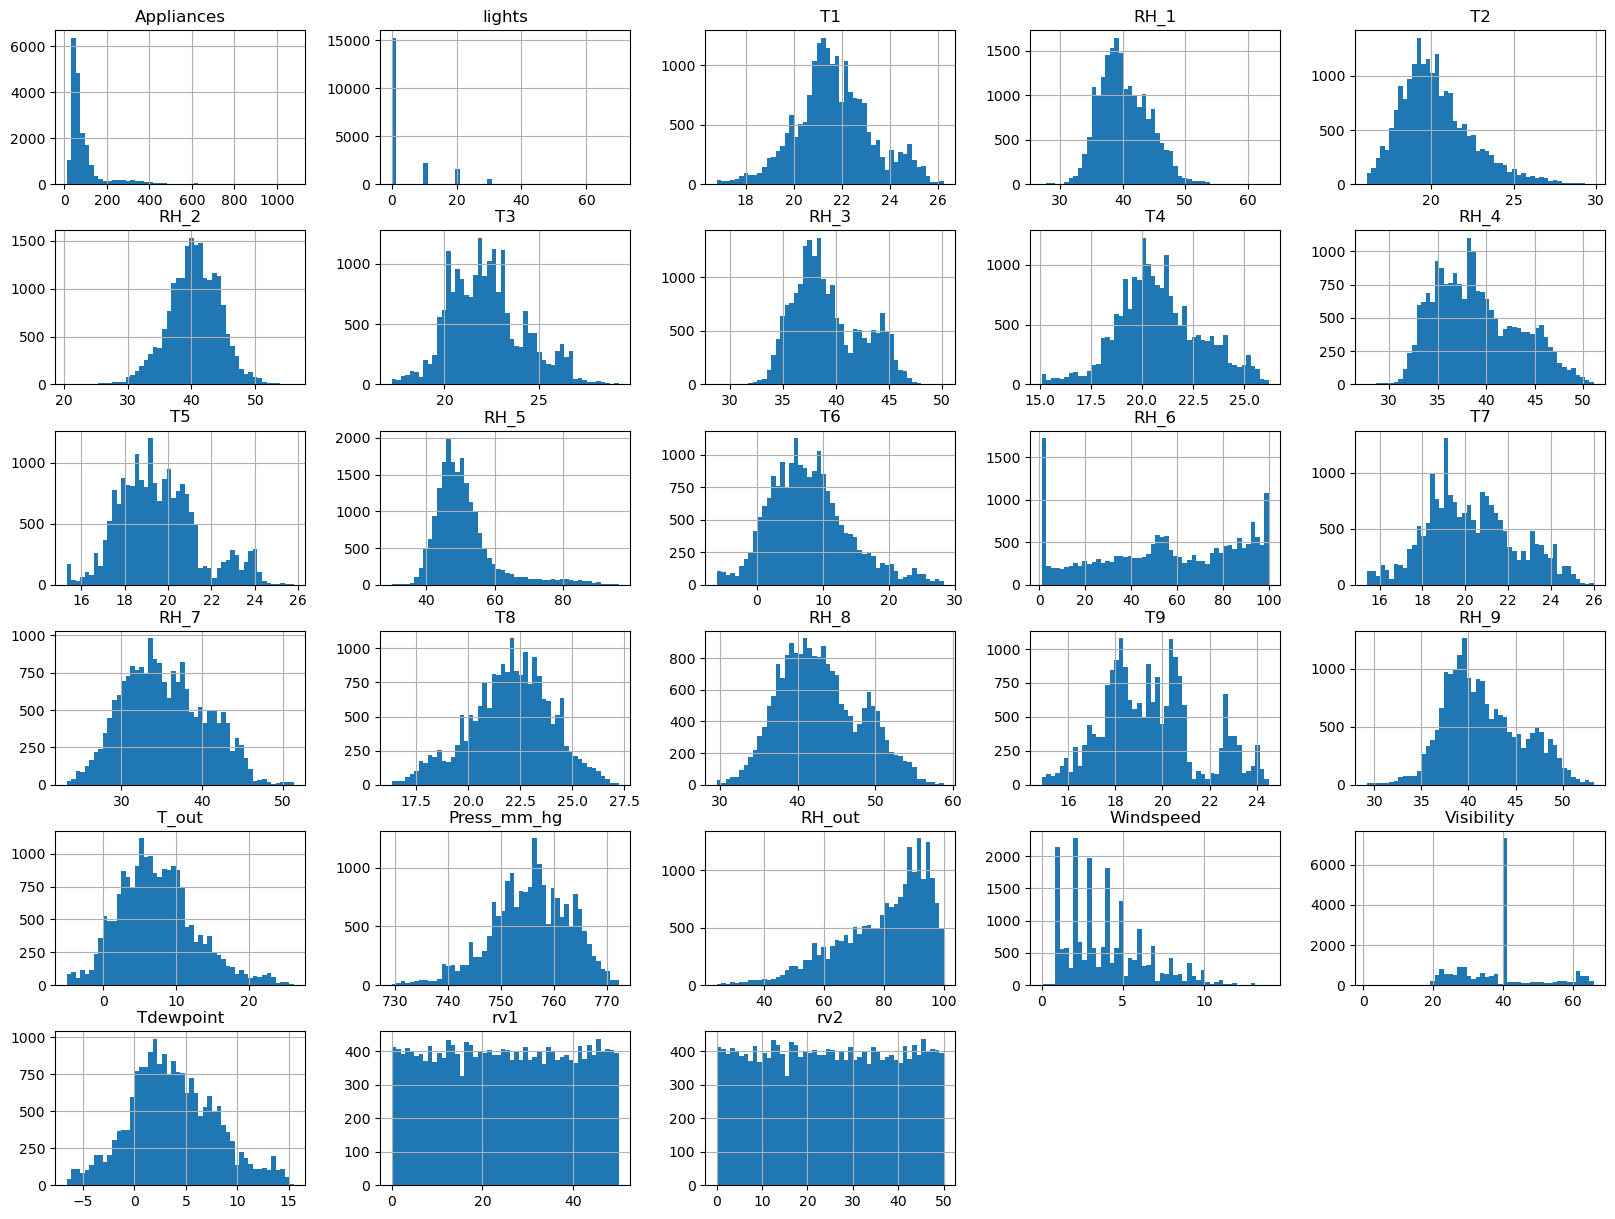

In [499]:
data.hist(bins=50, figsize=(20, 15))
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

The pair plot above suggests the following-:
1. The appliances is Right skewed.
2. T4 and T8 has similiar influence
3. Rv1 and RV2 seem to be irrelevant as they are evenly distributed

## Establishing the correlation

In [500]:
data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015357,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293307,-0.250748,0.336813,0.300192,0.002636,0.616508,-0.001787,-0.001787


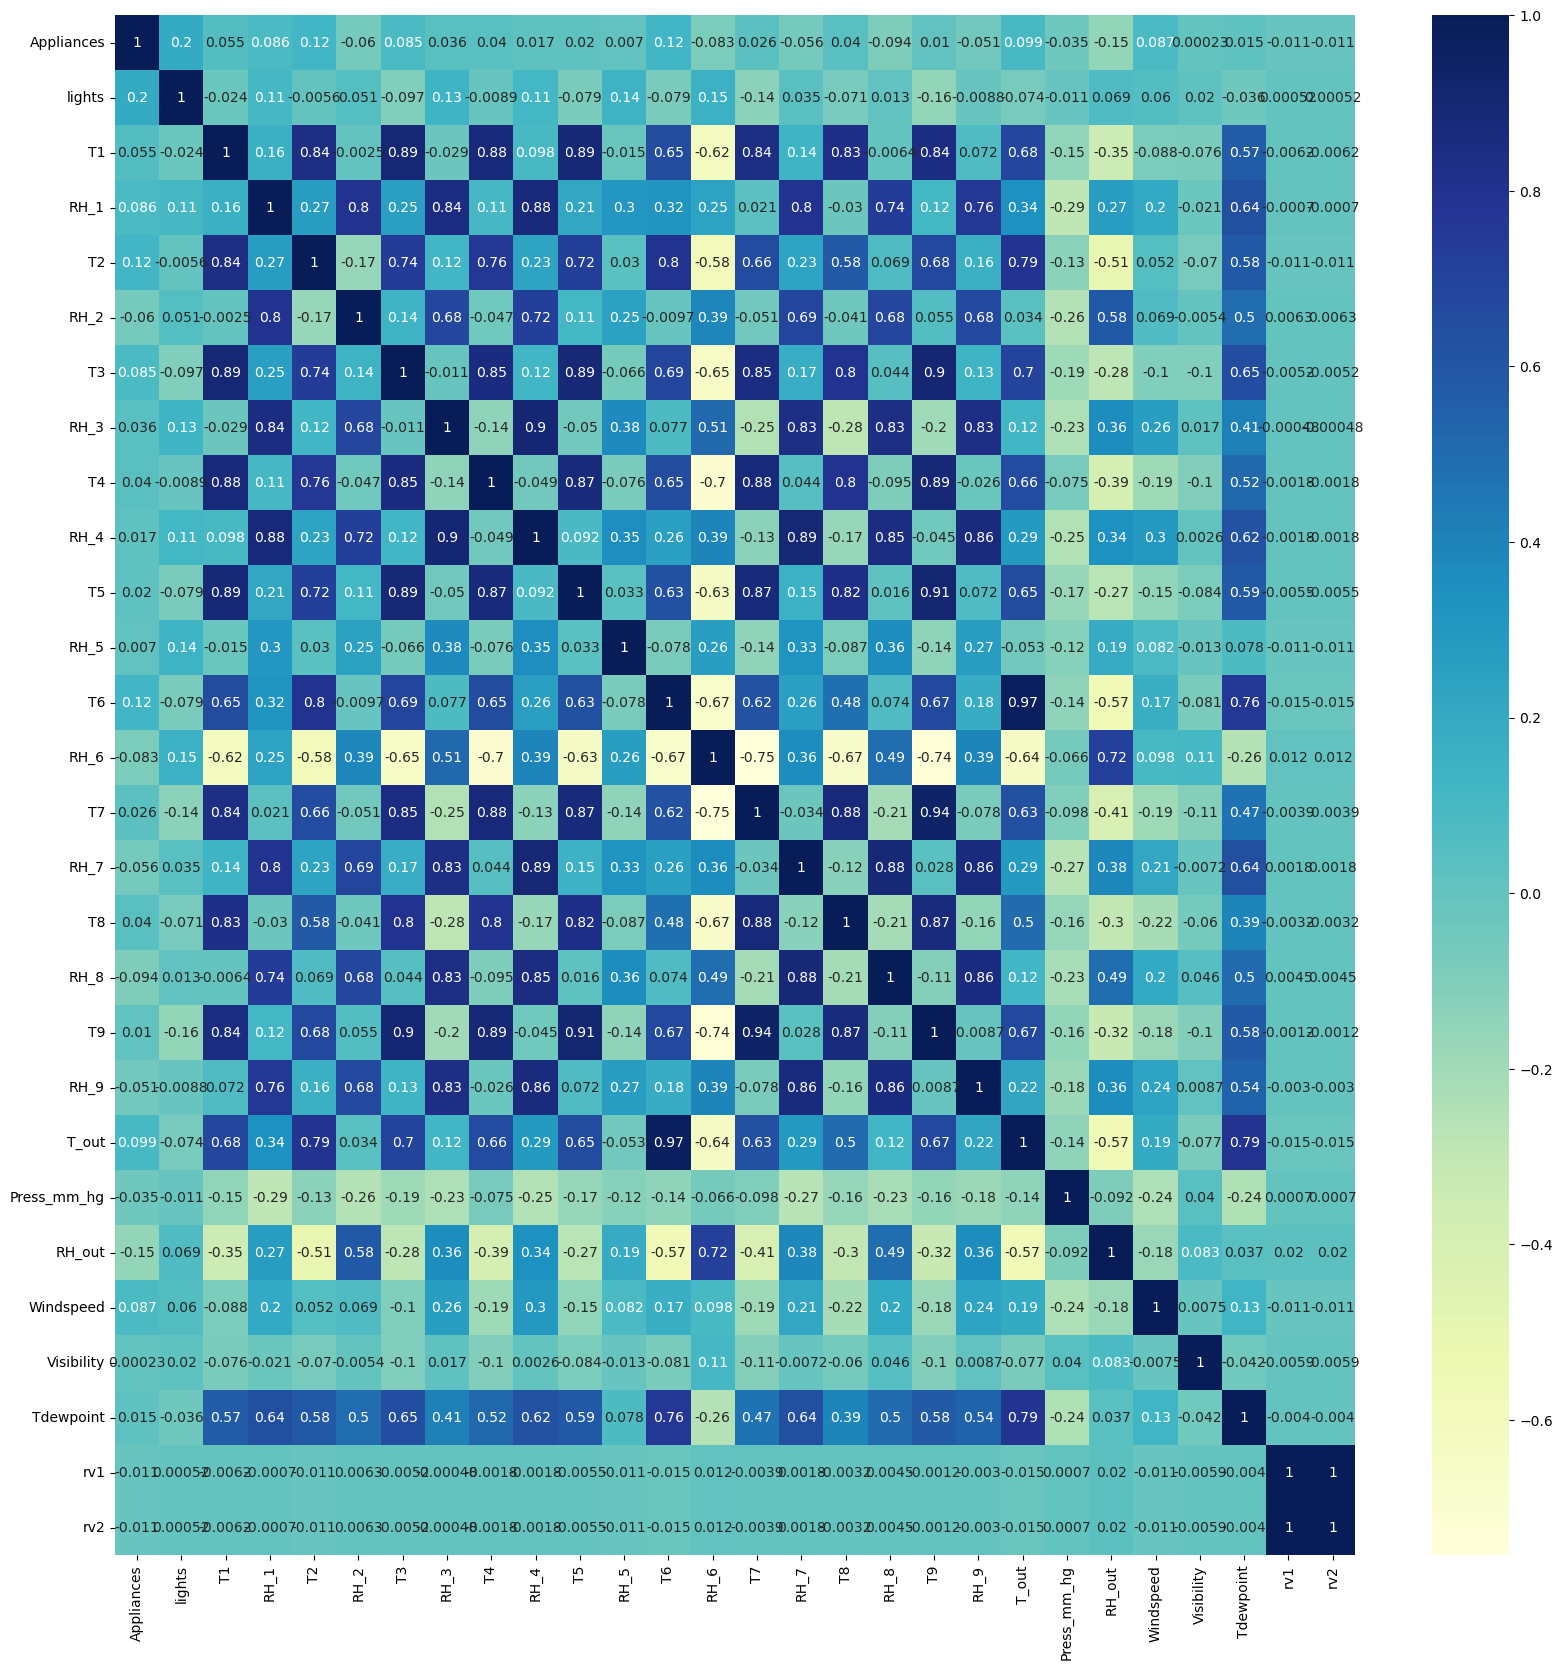

In [501]:
plt.figure(figsize=(20,20))
data_heatmap = sn.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [502]:
data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

<Axes: >

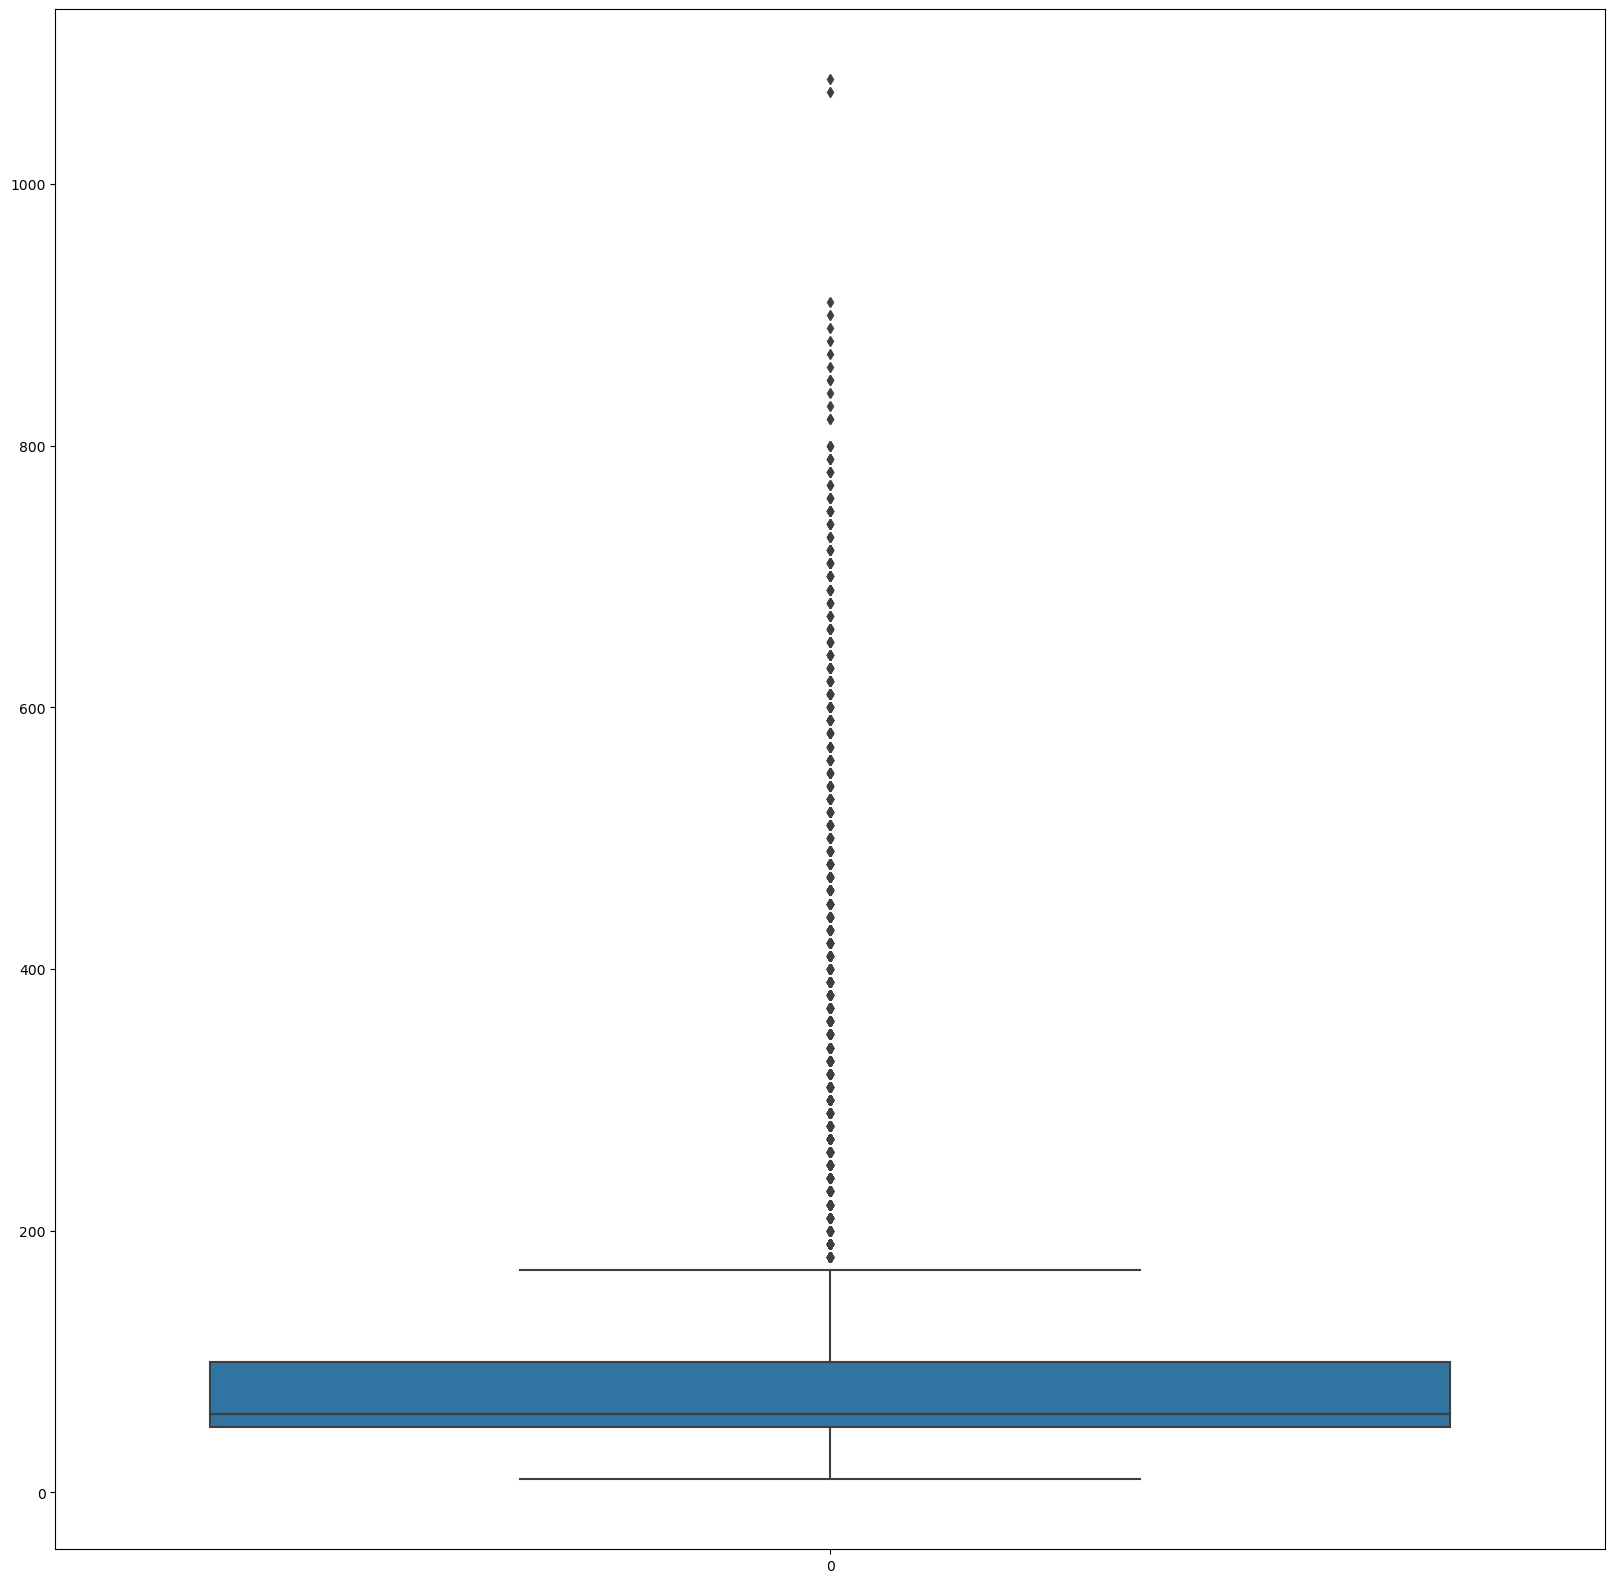

In [503]:
plt.figure(figsize=(20,20))
sn.boxplot(data['Appliances'])

### Regarding the outliers of appliances

The outliers hence will be anything above 200 and less than 0 as made evident from the box plot

<Axes: >

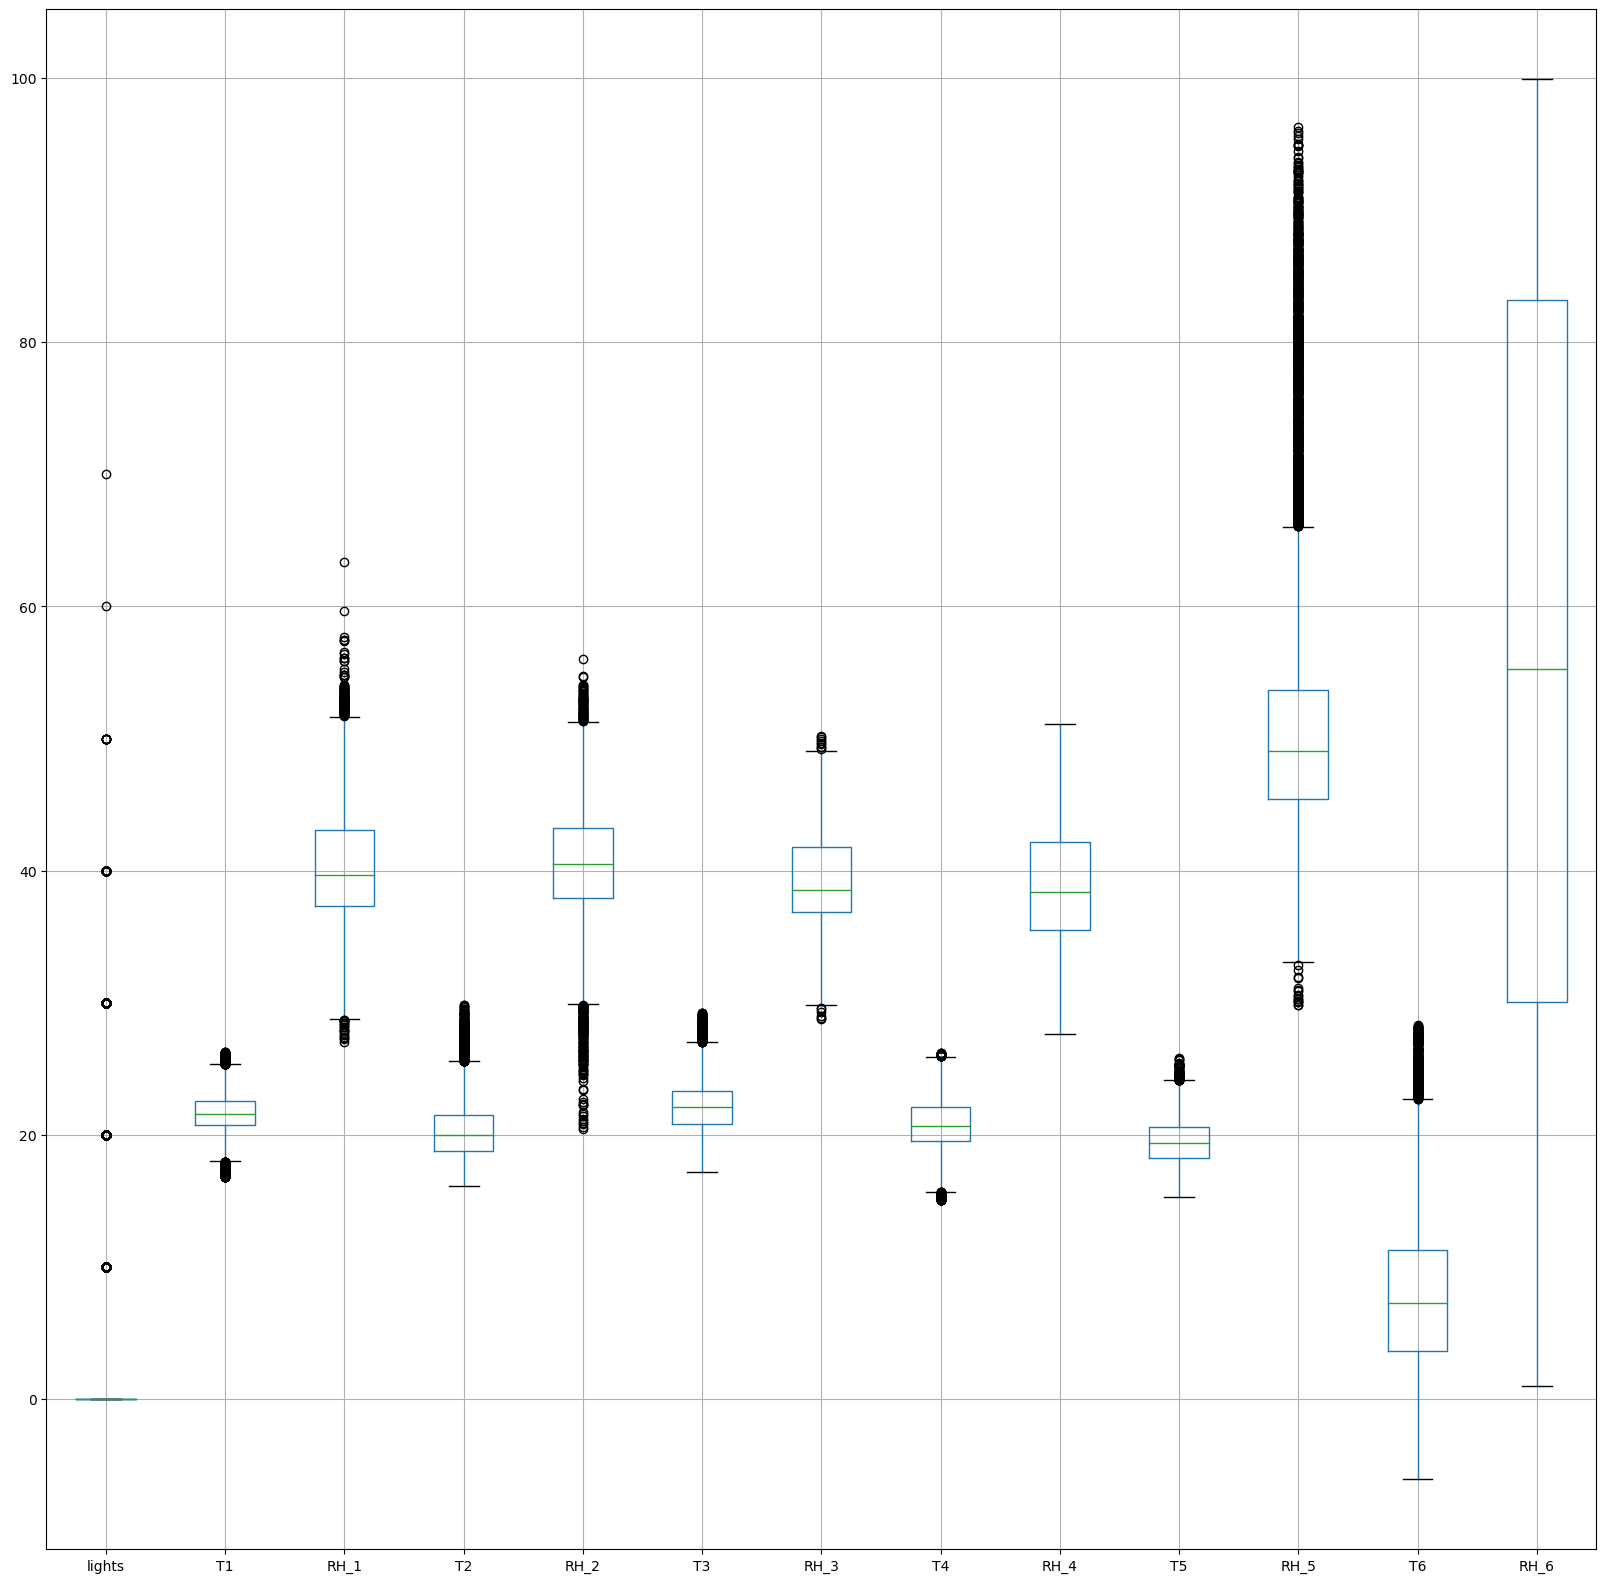

In [504]:
plt.figure(figsize=(20,20))
data.boxplot(column=[ 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6',])

<Axes: >

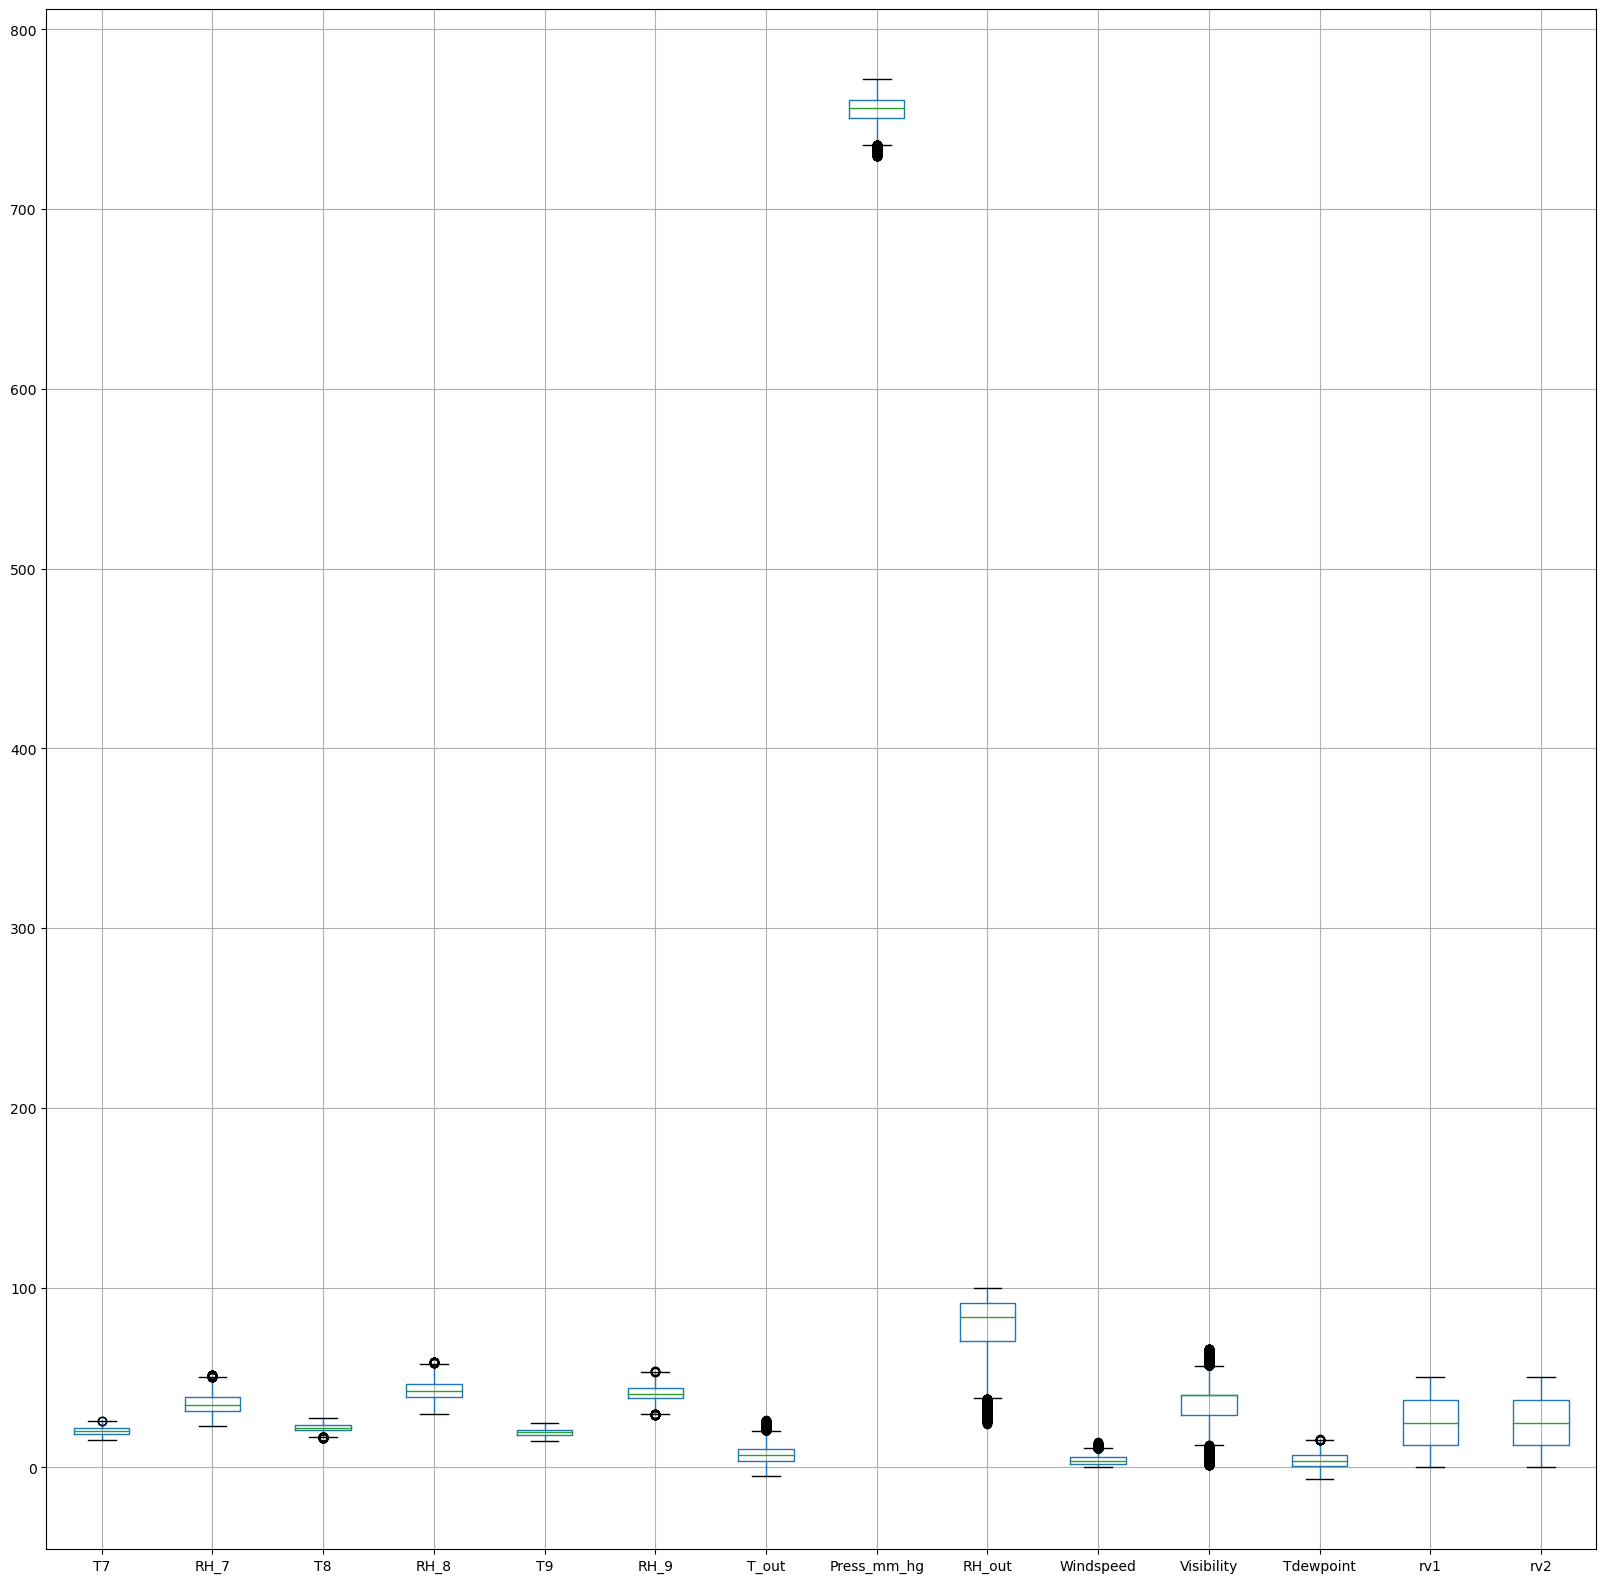

In [505]:
plt.figure(figsize=(20,20))
data.boxplot(column=[ 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'])

### 3. Pre-process the data

### Removing the outliers

#### Observations based on correlation plot
1. Dropping the outliers based on the box plot analysis as majority data lies in the scale of 0 to 200
2. The attributes of T6,T9, Visibility, pressure, Tdewpoint, Rh_1,RH_2 seems to be irrelevant as analyzed by box plots above.

In [506]:
data = data.drop(data[(data.Appliances>200)|(data.Appliances<0)].index)
df = data.copy(deep=True)

In [507]:
X =data.drop(data.loc[:,['Appliances', 'T6','T9','Visibility','rv1','rv2','Press_mm_hg','Tdewpoint','RH_1','RH_7']],axis=1)

In [508]:
X.head()

,lights,T1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,RH_6,T7,T8,RH_8,RH_9,T_out,RH_out,Windspeed
0,30,19.89,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,84.256667,17.200000,18.2,48.900000,45.53,6.60,92.0,7.000000
1,30,19.89,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,84.063333,17.200000,18.2,48.863333,45.56,6.48,92.0,6.666667
2,30,19.89,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,83.156667,17.200000,18.2,48.730000,45.50,6.37,92.0,6.333333
3,40,19.89,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,83.423333,17.133333,18.1,48.590000,45.40,6.25,92.0,6.000000
4,40,19.89,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,84.893333,17.200000,18.1,48.590000,45.40,6.13,92.0,5.666667


In [509]:
Y =data['Appliances']

In [510]:
Y.head()

0    60
1    60
2    50
3    50
4    60
Name: Appliances, dtype: int64

In [511]:
X.count()

lights       17819
T1           17819
T2           17819
RH_2         17819
T3           17819
RH_3         17819
T4           17819
RH_4         17819
T5           17819
RH_5         17819
RH_6         17819
T7           17819
T8           17819
RH_8         17819
RH_9         17819
T_out        17819
RH_out       17819
Windspeed    17819
dtype: int64

In [512]:
Y.count()

17819

### 4. Implement, train and test prediction models

Two models have been chosen-:
1. Linear regression
2. Support vector regression (SVR)

In [513]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 

In [515]:
y_test

6012      50
17463     60
10488     50
1725      70
10350     90
        ... 
6307      40
4352     120
8836      50
19058     50
13894     50
Name: Appliances, Length: 3564, dtype: int64

In [516]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [517]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(x_train , y_train) 

LinearRegression()

The below evaluation metrics code snippet has be taken from Kaggle.com
The alternate way was to use the inverse_transform function from the StandardScaler so as to use the functions of sk metrics like the accuracy score however the above code snippet is a function which is convinent when running aand comparing of different models is needed.

In [518]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error(Mean Absolute Error)       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy)) 

In [519]:
evaluate(ln, x_test, y_test)

LinearRegression() 

Average Error(Mean Absolute Error)       : 19.2971 degrees
Variance score R^2  : 27.15%
Accuracy            : 68.97%



The accuracy of the model is 68.97%


In [520]:
from sklearn import svm

svr_model = svm.SVR(gamma ='scale')
svr_model.fit(x_train , y_train) 

SVR()

In [521]:
evaluate(svr_model, x_test, y_test)

SVR() 

Average Error(Mean Absolute Error)       : 17.6548 degrees
Variance score R^2  : 28.56%
Accuracy            : 74.11%



The accuracy of the model is 74.11%


The histogram plot as shown above shows the right skewness of the appliances data , hence to take into account the skweness the data is log transformed using the np.log so as to determine if there is change in accuracy score.

In [522]:
data['log_appliances'] = np.log(data.Appliances)
data.log_appliances = data.log_appliances.astype(float)
Y1 =data['log_appliances']

In [523]:
X1 =data.drop(data.loc[:,['Appliances', 'T6','T9','Visibility','rv1','rv2','Press_mm_hg','Tdewpoint','RH_1','RH_7','log_appliances']],axis=1)

In [524]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state = 42) 

In [525]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train1)
x_train1 = scaler.transform(x_train1)
x_test1 = scaler.transform(x_test1)

In [526]:
from sklearn import linear_model

lin_model1 = linear_model.LinearRegression()
lin_model1.fit(x_train1 , y_train1) 

LinearRegression()

In [527]:
evaluate(lin_model1, x_test1, y_test1)

LinearRegression() 

Average Error(Mean Absolute Error)       : 0.2680 degrees
Variance score R^2  : 31.15%
Accuracy            : 93.44%



The transformation of appliances data to evenly distribute using the log transfrom draastically changes the prediction and accuracy score.

The results of linear model is an average score of 68 which is later improved by using the SVR model which increases the accuracy to 74.11. The pre-processing in the beginning did not take into account the skewness of the appliances data to be predicted which greatly influnces the score. As observed later including the log transformation of the appliances data, the accuracy rises to 93%.